<a href="https://colab.research.google.com/github/Lorenzo1208/Brief_fao/blob/main/FAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Analyses descriptives des données



In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#importations des différents csv dans des dataframes
animals_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_animal.csv')
#nommage des colonnes pour que ce soit homogène dans tous les df pour pouvoir les concatener
animals_df.rename(columns={'Code Domaine':'Code_Domaine', 'Code Pays': 'Code_Pays','Code Élément	':'Code_Élément', 'Code Produit': 'Code_Produit', 'Valeur': 'quantité',  'Code Année':'Code_Année', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# animals_df    

In [353]:
#on fait la même chose avec tous les csv
cereals_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_cereal.csv')
cereals_df.rename(columns={'Code Domaine':'Code_Domaine', 'Code Pays': 'Code_Pays','Code Élément	':'Code_Élément', 'Code Produit': 'Code_Produit', 'Code Année':'Code_Année', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# cereals_df.head()

In [354]:
population_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_population.csv')
population_df.rename(columns={'Domain Code':'Code_Domaine','Domain':'Domaine', 'Country Code': 'Code_Pays','Element Code':'Code_Élément', 'Element':'Élément','Item Code': 'Code_Produit', 'Item':'Produit', 'Year Code':'Code_Année','Year': 'Année' , 'Country': 'Pays', 'Unit': 'Unité', 'Value': 'population','Flag':'Symbole', 'Flag Description': 'Description_du_Symbole'}, inplace=True)
# population_df.head()

In [355]:
sous_alimentation_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_sous_alimentation.csv')
sous_alimentation_df.rename(columns={'Code Domaine':'Code_Domaine','Zone':'Pays', 'Code Pays': 'Code_Pays','Code Élément	':'Code_Élément', 'Code Produit': 'Code_Produit', 'Code Année':'Code_Année', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# sous_alimentation_df.head()

In [356]:
#on compare les tailles des différents dataframes
print(animals_df.shape)
print(cereals_df.shape)
print(population_df.shape)
print(sous_alimentation_df.shape)

(37166, 14)
(16057, 14)
(175, 14)
(204, 14)


In [357]:
type(population_df)

pandas.core.frame.DataFrame

In [358]:
population_df.count()

Code_Domaine              175
Domaine                   175
Code_Pays                 175
Pays                      175
Code_Élément              175
Élément                   175
Code_Produit              175
Produit                   175
Code_Année                175
Année                     175
Unité                     175
population                175
Symbole                     1
Description_du_Symbole    175
dtype: int64

In [359]:
list(population_df.columns)

['Code_Domaine',
 'Domaine',
 'Code_Pays',
 'Pays',
 'Code_Élément',
 'Élément',
 'Code_Produit',
 'Produit',
 'Code_Année',
 'Année',
 'Unité',
 'population',
 'Symbole',
 'Description_du_Symbole']

In [360]:
population_df[["population"]].describe().round(2)

,population
count,175.00
mean,48079.96
std,178632.74
min,54.00
25%,2543.50
50%,9413.00
75%,28881.50
max,1416667.00


In [361]:
#on regarde les statistiques de la colonne "population", notamment pour obtenir la valeur max
population_df.population.describe()

count    1.750000e+02
mean     4.807996e+04
std      1.786327e+05
min      5.400000e+01
25%      2.543500e+03
50%      9.413000e+03
75%      2.888150e+04
max      1.416667e+06
Name: population, dtype: float64

In [362]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37166 entries, 0 to 37165
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code_Domaine            37166 non-null  object 
 1   Domaine                 37166 non-null  object 
 2   Code_Pays               37166 non-null  int64  
 3   Pays                    37166 non-null  object 
 4   Code Élément            37166 non-null  int64  
 5   Élément                 37166 non-null  object 
 6   Code_Produit            37166 non-null  int64  
 7   Produit                 37166 non-null  object 
 8   Code_Année              37166 non-null  int64  
 9   Année                   37166 non-null  int64  
 10  Unité                   37166 non-null  object 
 11  quantité                37166 non-null  float64
 12  Symbole                 37166 non-null  object 
 13  Description_du_Symbole  37166 non-null  object 
dtypes: float64(1), int64(5), object(8)
mem

In [363]:
population_df.columns

Index(['Code_Domaine', 'Domaine', 'Code_Pays', 'Pays', 'Code_Élément',
       'Élément', 'Code_Produit', 'Produit', 'Code_Année', 'Année', 'Unité',
       'population', 'Symbole', 'Description_du_Symbole'],
      dtype='object')

In [364]:
vegetal_df.columns

Index(['Code_Domaine', 'Domaine', 'Code_Pays', 'Pays', 'Code_Élément',
       'Élément', 'Code_Produit', 'Produit', 'Code_Année', 'Année', 'Unité',
       'quantité', 'Symbole', 'Description_du_Symbole', 'Origine'],
      dtype='object')

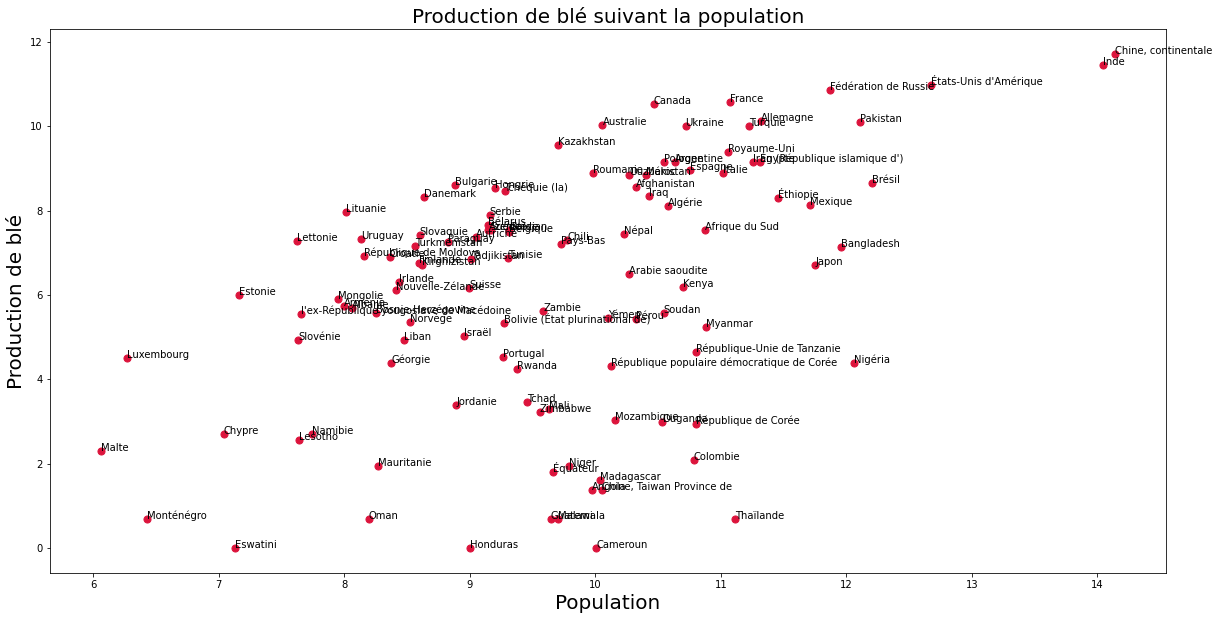

In [433]:

#on effectue un tri sur les lignes dont la colonne élément correspond à production    
selection = cereals_df['Élément'] == 'Production'
#print(selection)
cereals_df2 = cereals_df[selection]

#deuxième tri sur les lignes dont la colonne produit correspond à blé
cereals_df2 = cereals_df2[cereals_df2['Produit'] == 'Blé']
#on filtre les valeus nulles pour éviter les divisions par 0
cereals_df2 = cereals_df2[cereals_df2['Valeur'] > 0]
#on extrait uniquement les colonnes valeur et code pays
cereals_df2 = cereals_df2[["Valeur", "Pays", "Code_Pays"]]
#print(df_cereal)

#df_population.index = df_population['Code Pays']

population_df3 = population_df[["population", "Code_Pays"]]
#print(df_population)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
#on joint les deux df avec 'code pays' comme index et on précise le nom des tableaux pour les colonnes valeur
df_graph = cereals_df2.set_index('Code_Pays').join(population_df3.set_index('Code_Pays'), lsuffix="_cereal", rsuffix="_population")


#on fait un graphique scatter plot avec les valeurs x et y qui nous intéressent
#log permet de tasser en enlevant la puissance
graph = plt.scatter(np.log(df_graph["population"]), np.log(df_graph['Valeur']), color='crimson', s=50)

#ajouter le nom des pays à côté de chaque point en ittérant sur les lignes et non les colonnes
#on applique également la fonction log pour que les noms aient la même distribution que les points
for i, x in df_graph.iterrows():
    plt.annotate(x['Pays'], (np.log(x['population']), np.log(x['Valeur'])))

#afficher dans le terminal
# plt.figure(figsize=(15, 10))
plt.xlabel('Population',fontsize=20)
plt.ylabel('Production de blé',fontsize=20)
plt.title("Production de blé suivant la population", fontsize=20)
plt.show()

# ✅ Question 1 : Nombre d'humains sur la planète 

In [366]:
#on récupére le total de la population mondiale
sum_of_column = population_df['population'].sum()
print(sum_of_column*1000)
# l'unité est en millier de personnes donc on multiplie par 1000

8413993000


# Selon wikipedia en 2013 nous étions 7,17 Milliards d'habitants et la Chine comptait 1,3 Mds d'habitants. Comment expliquer les 8 413 993 000 ?

In [367]:
population_df['population'].duplicated().value_counts()
#pas de duplicata
#175 pays dans le csv

False    175
Name: population, dtype: int64

In [368]:
#on cherche à connaître les pays avec la plus grande population
population_df.sort_values(by='population', ascending=False).head()

,Code_Domaine,Domaine,Code_Pays,Pays,Code_Élément,Élément,Code_Produit,Produit,Code_Année,Année,Unité,population,Symbole,Description_du_Symbole
174,FBS,Food Balance Sheets,351,China,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,1416667,A,"Aggregate, may include official, semi-official..."
34,FBS,Food Balance Sheets,41,"China, mainland",511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,1385567,NaN,Official data
73,FBS,Food Balance Sheets,100,India,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,1252140,NaN,Official data
165,FBS,Food Balance Sheets,231,United States of America,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,320051,NaN,Official data
74,FBS,Food Balance Sheets,101,Indonesia,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,249866,NaN,Official data


# La Chine était comptée 2 fois, en effet il y avait la Chine et ses territoires semi-indépendants (Hong kong, Macao, Taïwan).On va donc supprimer la valeur totale et laisser les territoires semi-indépendants.

In [369]:
#suppression de la ligne "Chine"
population_df.drop(population_df[population_df['Pays'] == 'China'].index, inplace=True)
sum_of_column = population_df['population'].sum()
population_mondiale = sum_of_column*1000
population_mondiale

6997326000

In [370]:
#suppression de la ligne "Chine" pour les autres dataframes
# cereals_df.drop(cereals_df[cereals_df['Pays'] == 'Chine'].index, inplace=True)
# animals_df.drop(animals_df[animals_df['Pays'] == 'Chine'].index, inplace=True)
# vegetal_df.drop(vegetal_df[vegetal_df['Pays'] == 'Chine'].index, inplace=True)

# Il manque encore environ 100 millions d'habitants mais ici il n'y a que 174 pays alors que l'ONU en reconnaît officiellement 194. Il manque donc peut-être certains pays, comme le Vatican, Andorre, à moins qu'il n'aient été comptés respectivement dans la population de l'Italie et de la France, mais nous manquons de données pour en être sûrs. Nous allons donc partir du principe qu'il y avait 6 997 326 000 habitants.

# ✅ Question 2 : Redondances

In [371]:
#on extrait les données concernant le blé en France et on affiche les 11 éléments qui nous intéressent
cereal_blé_df = cereals_df[(cereals_df.Pays == 'France') & (cereals_df.Produit == 'Blé')]
cereal_blé_df.head(11)

,Code_Domaine,Domaine,Code_Pays,Pays,Code Élément,Élément,Code_Produit,Produit,Code_Année,Année,Unité,Valeur,Symbole,Description_du_Symbole
5415,FBS,Bilans Alimentaires,68,France,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,38614.0,S,Données standardisées
5416,FBS,Bilans Alimentaires,68,France,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,2055.0,S,Données standardisées
5417,FBS,Bilans Alimentaires,68,France,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,1131.0,S,Données standardisées
5418,FBS,Bilans Alimentaires,68,France,5911,Exportations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,21502.0,S,Données standardisées
5419,FBS,Bilans Alimentaires,68,France,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,20298.0,S,Données standardisées
5420,FBS,Bilans Alimentaires,68,France,5521,Aliments pour animaux,2511,Blé,2013,2013,Milliers de tonnes,7822.0,S,Données standardisées
5421,FBS,Bilans Alimentaires,68,France,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,748.0,S,Données standardisées
5422,FBS,Bilans Alimentaires,68,France,5123,Pertes,2511,Blé,2013,2013,Milliers de tonnes,358.0,S,Données standardisées
5423,FBS,Bilans Alimentaires,68,France,5131,Traitement,2511,Blé,2013,2013,Milliers de tonnes,1575.0,S,Données standardisées
5424,FBS,Bilans Alimentaires,68,France,5154,Autres Utilisations,2511,Blé,2013,2013,Milliers de tonnes,2824.0,S,Données standardisées


# disponibilitéIntérieure = (Nourriture+NourritureAnimaux+Semences+Pertes+Traitements+AutresUtilisations)=(Production+Importation+VariationDeStock)−Exportation

In [372]:
#on assigne à chaque élément sa valeur
cereal_blé_élément = cereal_blé_df['Élément']
disponibilité_interieur = cereal_blé_df[cereal_blé_élément == 'Disponibilité intérieure']['Valeur'].sum()
production = cereal_blé_df[cereal_blé_élément == 'Production']['Valeur'].sum()
imports = cereal_blé_df[cereal_blé_élément == 'Importations - Quantité']['Valeur'].sum()
exports = cereal_blé_df[cereal_blé_élément == 'Exportations - Quantité']['Valeur'].sum()
stock_variation = cereal_blé_df[cereal_blé_élément == 'Variation de stock']['Valeur'].sum()
semences = cereal_blé_df[cereal_blé_élément == 'Semences']['Valeur'].sum()
nourriture_animaux = cereal_blé_df[cereal_blé_élément == 'Aliments pour animaux']['Valeur'].sum()
nourriture = cereal_blé_df[cereal_blé_élément == 'Nourriture']['Valeur'].sum()
pertes = cereal_blé_df[cereal_blé_élément == 'Pertes']['Valeur'].sum()
traitement = cereal_blé_df[cereal_blé_élément == 'Traitement']['Valeur'].sum()
autres = cereal_blé_df[cereal_blé_élément == 'Autres Utilisations']['Valeur'].sum()
#on vérifie que la formule trouvée fonctionne dans le cas du blé en France
print('La disponibilité intérieure vaut : {}'.format(disponibilité_interieur))
print('Production + Imports + Variation - Exports : {}'.format((production + imports + stock_variation) - exports))
print('semences + nourriture_animaux + nourriture + pertes + traitement + autres : {}'.format(semences + nourriture_animaux + nourriture + pertes + traitement + autres))

La disponibilité intérieure vaut : 20298.0
Production + Imports + Variation - Exports : 20298.0
semences + nourriture_animaux + nourriture + pertes + traitement + autres : 20298.0


# ✅ Question 3 : Disponibilité alimentaire (calories, protéines)

Définition : La disponibilité alimentaire c'est la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée, dont l'approvisionnement est assurée par la production nationale ou les importations.

Calculons cette valeur par Pays et par Produit: en kcal/personne/jour et en kg de protéines/personne/jour.

On possède pour certains produits avec des unités en g/personne/jour on va pouvoir les convertir en kg/personne/jour

Disponibilité de protéines en quantité (g/personne/jour) => Disponibilité de protéines en quantité (kg/personne/jour)

In [373]:
#on importe le fichier csv dans un dataframe
vegetal_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_vegetal.csv')
#on renomme les colonnes comme les df précédents
vegetal_df.rename(columns={'Code Domaine':'Code_Domaine', 'Code Pays': 'Code_Pays','Code Élément':'Code_Élément', 'Code Produit': 'Code_Produit', 'Code Année':'Code_Année','Valeur':'quantité', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# Ajout d'une colonne 'Origine' dans animaux et vegetaux
animals_df['Origine'] = 'Animale'
vegetal_df['Origine'] = 'Végétale'
vegetal_df.head()

,Code_Domaine,Domaine,Code_Pays,Pays,Code_Élément,Élément,Code_Produit,Produit,Code_Année,Année,Unité,quantité,Symbole,Description_du_Symbole,Origine
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées,Végétale
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées,Végétale
2,FBS,Bilans Alimentaires,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,2013,Milliers de tonnes,-350.0,S,Données standardisées,Végétale
3,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,2013,Milliers de tonnes,5992.0,S,Données standardisées,Végétale
4,FBS,Bilans Alimentaires,2,Afghanistan,5527,Semences,2511,Blé,2013,2013,Milliers de tonnes,322.0,S,Données standardisées,Végétale


In [374]:
#on concatène les deux dataframes animals et vegetal
aliments_df = pd.concat([animals_df,vegetal_df])
aliments_df.head()

,Code_Domaine,Domaine,Code_Pays,Pays,Code Élément,Élément,Code_Produit,Produit,Code_Année,Année,Unité,quantité,Symbole,Description_du_Symbole,Origine,Code_Élément
0,FBS,Bilans Alimentaires,2,Afghanistan,5511.0,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,Animale,NaN
1,FBS,Bilans Alimentaires,2,Afghanistan,5611.0,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,Animale,NaN
2,FBS,Bilans Alimentaires,2,Afghanistan,5301.0,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,Animale,NaN
3,FBS,Bilans Alimentaires,2,Afghanistan,5142.0,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,Animale,NaN
4,FBS,Bilans Alimentaires,2,Afghanistan,645.0,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,Animale,NaN


In [375]:
#on pivote les données dans le dataframe avec en index les pays et code pays, les produits et code produits ainsi que l'origine
aliments_df =  aliments_df.pivot_table(
    index=["Code_Pays","Pays","Code_Produit","Produit", "Origine"],
    columns = ["Élément"], values=["quantité"], aggfunc=sum)
aliments_df

quantité  \
Élément                                                          Aliments pour animaux   
Code_Pays Pays    Code_Produit Produit                  Origine                          
1         Arménie 2511         Blé                      Végétale                  93.0   
                  2513         Orge                     Végétale                 137.0   
                  2514         Maïs                     Végétale                  96.0   
                  2515         Seigle                   Végétale                   1.0   
                  2516         Avoine                   Végétale                   4.0   
...                                                                                ...   
351       Chine   2781         Huiles de Poissons       Animale                   47.0   
                  2782         Huiles de Foie de Poisso Animale                    0.0   
                  2805         Riz (Eq Blanchi)         Végétale               12117.0   
                  2848         Lait - Excl Beurre       Animale                 1632.0   
                  2899         Miscellanees             Végétale                   NaN   

                                                                                      \
Élément                                                          Autres Utilisations   
Code_Pays Pays    Code_Produit Produit                  Origine                        
1         Arménie 2511         Blé                      Végétale                 0.0   
                  2513         Orge                     Végétale                26.0   
                  2514         Maïs                     Végétale                 NaN   
                  2515         Seigle                   Végétale                 NaN   
                  2516         Avoine                   Végétale                 NaN   
...                                                                              ...   
351       Chine   2781         Huiles de Poissons       Animale                 80.0   
                  2782         Huiles de Foie de Poisso Animale                  0.0   
                  2805         Riz (Eq Blanchi)         Végétale              2085.0   
                  2848         Lait - Excl Beurre       Animale                 42.0   
                  2899         Miscellanees             Végétale                 NaN   

                                                                                                                 \
Élément                                                          Disponibilité alimentaire (Kcal/personne/jour)   
Code_Pays Pays    Code_Produit Produit                  Origine                                                   
1         Arménie 2511         Blé                      Végétale                                         1024.0   
                  2513         Orge                     Végétale                                            0.0   
                  2514         Maïs                     Végétale                                            0.0   
                  2515         Seigle                   Végétale                                            1.0   
                  2516         Avoine                   Végétale                                            2.0   
...                                                                                                         ...   
351       Chine   2781         Huiles de Poissons       Animale                                             0.0   
                  2782         Huiles de Foie de Poisso Animale                                             0.0   
                  2805         Riz (Eq Blanchi)         Végétale                                          797.0   
                  2848         Lait - Excl Beurre       Animale                                            59.0   
                  2899         Miscellanees             Végétale                         

In [376]:
#on renomme les colonnes du dataframe
aliments_df.columns = ['Aliments pour animaux', 'Autres utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
    'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 
    'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure', 'Exportations - Quantité',
    'Importations - Quantité', 'Nourriture', 'Pertes',
    'Production', 'Semences', 'Traitement','Variation de stock']

In [377]:
#on réattribue un index pour chaque ligne
aliments_df = aliments_df.reset_index()
aliments_df

,Code_Pays,Pays,Code_Produit,Produit,Origine,Aliments pour animaux,Autres utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,1,Arménie,2511,Blé,Végétale,93.0,0.0,1024.0,130.60,3.60,30.52,554.0,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0
1,1,Arménie,2513,Orge,Végétale,137.0,26.0,0.0,0.00,0.00,0.00,198.0,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0
2,1,Arménie,2514,Maïs,Végétale,96.0,NaN,0.0,0.03,NaN,0.01,102.0,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN
3,1,Arménie,2515,Seigle,Végétale,1.0,NaN,1.0,0.12,0.00,0.02,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0
4,1,Arménie,2516,Avoine,Végétale,4.0,NaN,2.0,0.37,0.03,0.09,6.0,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,351,Chine,2781,Huiles de Poissons,Animale,47.0,80.0,0.0,0.00,0.00,0.00,127.0,13.0,91.0,0.0,NaN,50.0,NaN,NaN,0.0
15698,351,Chine,2782,Huiles de Foie de Poisso,Animale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,0.0
15699,351,Chine,2805,Riz (Eq Blanchi),Végétale,12117.0,2085.0,797.0,77.45,2.68,14.47,135024.0,565.0,2714.0,109725.0,6406.0,136873.0,4679.0,12.0,-3998.0
15700,351,Chine,2848,Lait - Excl Beurre,Animale,1632.0,42.0,59.0,33.18,3.25,3.12,50117.0,233.0,9780.0,47009.0,1433.0,40570.0,NaN,0.0,0.0


In [378]:
# Ajout de la population à data via une jointure
aliments_df = pd.merge(aliments_df, population_df[['Code_Pays','population']], on=["Code_Pays"])
aliments_df["population"] = aliments_df["population"] * 1000
aliments_df.head()

,Code_Pays,Pays,Code_Produit,Produit,Origine,Aliments pour animaux,Autres utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population
0,1,Arménie,2511,Blé,Végétale,93.0,0.0,1024.0,130.60,3.60,...,554.0,1.0,361.0,389.0,32.0,312.0,30.0,10.0,-118.0,2977000
1,1,Arménie,2513,Orge,Végétale,137.0,26.0,0.0,0.00,0.00,...,198.0,0.0,9.0,0.0,15.0,189.0,14.0,7.0,0.0,2977000
2,1,Arménie,2514,Maïs,Végétale,96.0,NaN,0.0,0.03,NaN,...,102.0,NaN,82.0,0.0,7.0,21.0,0.0,NaN,NaN,2977000
3,1,Arménie,2515,Seigle,Végétale,1.0,NaN,1.0,0.12,0.00,...,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,2977000
4,1,Arménie,2516,Avoine,Végétale,4.0,NaN,2.0,0.37,0.03,...,6.0,NaN,1.0,1.0,0.0,5.0,0.0,NaN,NaN,2977000


In [379]:
#on convertit les colonnes dispo alimentaire en kcal/personne/jour en dispo alimentaire pour tout le pays sur un an
#on multiplie par le nombre de jours dans une année
# Disponibilité intérieure
aliments_df["dispo_alimentaire_kcal"] = aliments_df["Disponibilité alimentaire (Kcal/personne/jour)"] * aliments_df["population"] * 365
#on multiplie par la population du pays
aliments_df["dispo_alimentaire_kgprotein"] = aliments_df["Disponibilité de protéines en quantité (g/personne/jour)"] * 0.001 * aliments_df["population"] * 365

In [380]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#on crée une liste des pays uniques dans le df aliments par ordre alphabétique
countries = sorted(list(aliments_df['Pays'].unique()))
#on fait la même chose avec les produits
products = sorted(list(aliments_df['Produit'].unique()))
#on sélectionne les colonnes qui nous intéressent et on crée un nouveau dataframe
aliments_df2 = aliments_df[["Code_Pays", "Pays", "Code_Produit", "Produit","population", "dispo_alimentaire_kcal", "dispo_alimentaire_kgprotein"]]

#on crée une fonction qui permet de sélectionner le pays et le produit que l'on veut observer
@interact
def show_per_country(country=countries, product=products):
    return aliments_df2.loc[(aliments_df2['Pays'] == country) & (aliments_df2['Produit'] == product)]

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Afrique du Sud', 'Albanie', 'Al…

# ✅ Question 4 : Ratios énergétiques

établir un ratio "énergie/poids" (en kcal/kg) pour chaque produit par pays
établir un ratio "poids de protéine / poids total" pour chaque produit par pays

Pour le ratio "poids des protéines / poids total"

In [381]:
#on convertit les valeurs de la colonne nourriture en kg
aliments_df["dispo_alimentaire_kg"] = aliments_df["Nourriture"] * 1000000
#on supprime les valeurs égales à 0 
mask = aliments_df["dispo_alimentaire_kg"] != 0
aliments_df.loc[mask, 'ratio_kcal/kg'] = aliments_df.loc[mask, "dispo_alimentaire_kcal"] / aliments_df.loc[mask, "dispo_alimentaire_kg"]
aliments_df

,Code_Pays,Pays,Code_Produit,Produit,Origine,Aliments pour animaux,Autres utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Pertes,Production,Semences,Traitement,Variation de stock,population,dispo_alimentaire_kcal,dispo_alimentaire_kgprotein,dispo_alimentaire_kg,ratio_kcal/kg
0,1,Arménie,2511,Blé,Végétale,93.0,0.0,1024.0,130.60,3.60,...,32.0,312.0,30.0,10.0,-118.0,2977000,1.112684e+12,3.316318e+07,3.890000e+08,2860.368946
1,1,Arménie,2513,Orge,Végétale,137.0,26.0,0.0,0.00,0.00,...,15.0,189.0,14.0,7.0,0.0,2977000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,1,Arménie,2514,Maïs,Végétale,96.0,NaN,0.0,0.03,NaN,...,7.0,21.0,0.0,NaN,NaN,2977000,0.000000e+00,1.086605e+04,0.000000e+00,NaN
3,1,Arménie,2515,Seigle,Végétale,1.0,NaN,1.0,0.12,0.00,...,0.0,1.0,0.0,NaN,0.0,2977000,1.086605e+09,2.173210e+04,0.000000e+00,NaN
4,1,Arménie,2516,Avoine,Végétale,4.0,NaN,2.0,0.37,0.03,...,0.0,5.0,0.0,NaN,NaN,2977000,2.173210e+09,9.779445e+04,1.000000e+06,2173.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,276,Soudan,2763,Poissons Pelagiques,Animale,NaN,0.0,0.0,0.00,0.00,...,NaN,0.0,NaN,NaN,NaN,37964000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
15601,276,Soudan,2764,"Poissons Marins, Autres",Animale,NaN,0.0,0.0,0.13,0.01,...,NaN,5.0,NaN,NaN,NaN,37964000,0.000000e+00,5.542744e+05,5.000000e+06,0.000000
15602,276,Soudan,2805,Riz (Eq Blanchi),Végétale,NaN,NaN,14.0,1.27,0.05,...,NaN,17.0,1.0,NaN,0.0,37964000,1.939960e+11,3.879921e+06,4.800000e+07,4041.584167
15603,276,Soudan,2848,Lait - Excl Beurre,Animale,NaN,0.0,315.0,155.20,20.01,...,NaN,5660.0,NaN,0.0,NaN,37964000,4.364911e+12,2.182455e+08,5.892000e+09,740.819908


In [382]:
#on regroupe les données par produit en appliquant la moyenne
stat_par_pays_df = aliments_df.groupby("Produit").mean()
stat_par_pays_df

,Code_Pays,Code_Produit,Aliments pour animaux,Autres utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Pertes,Production,Semences,Traitement,Variation de stock,population,dispo_alimentaire_kcal,dispo_alimentaire_kgprotein,dispo_alimentaire_kg,ratio_kcal/kg
Produit,,,,,,,,,,,,,,,,,,,,,
Abats Comestible,125.431034,2736.0,43.869565,16.307692,8.505747,2.730345,0.254767,1.328621,101.074713,36.488889,...,3.476190,107.462428,NaN,NaN,0.481481,4.021452e+07,9.907831e+10,1.609122e+07,9.005172e+07,1129.258163
"Agrumes, Autres",125.725000,2614.0,NaN,3.125000,0.831169,1.348839,0.008211,0.018559,76.100000,6.148148,...,14.727273,183.718750,NaN,6.000000,0.851852,4.267466e+07,1.606344e+10,4.411723e+05,7.328387e+07,90.316654
"Alcool, non Comestible",125.693750,2659.0,NaN,137.778481,NaN,NaN,NaN,NaN,135.881250,79.200000,...,NaN,324.421875,NaN,NaN,20.652174,4.212981e+07,NaN,NaN,NaN,NaN
Aliments pour enfants,125.023392,2680.0,NaN,0.000000,4.049689,0.404596,0.031824,0.168696,0.491228,7.609023,...,0.500000,NaN,NaN,NaN,0.195122,4.071432e+07,1.736034e+10,7.338130e+05,4.726708e+06,3224.621937
Ananas,125.702381,2618.0,NaN,0.428571,3.922619,3.890536,0.015200,0.031544,138.583333,55.579710,...,30.500000,311.205128,NaN,0.800000,5.132353,4.082818e+07,4.212772e+10,3.684822e+05,1.235536e+08,366.683059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viande de Suides,126.191860,2733.0,NaN,7.282051,90.627219,14.663373,8.103728,4.086310,654.343023,105.068027,...,15.277778,702.322981,NaN,1.058824,0.525641,4.048491e+07,1.880341e+12,7.060198e+07,6.633136e+08,2465.154753
Viande de Volailles,125.431034,2734.0,0.000000,31.450000,74.879310,20.561322,4.921379,7.143391,614.798851,113.551020,...,38.500000,630.941860,NaN,12.810811,0.684211,4.021452e+07,8.617331e+11,7.570735e+07,6.027069e+08,1301.310330
"Viande, Autre",125.431034,2735.0,5.700000,1.000000,6.143678,1.800977,0.271570,0.866092,39.132184,5.408451,...,2.600000,46.764706,NaN,0.850000,0.038462,4.021452e+07,4.611526e+10,6.951264e+06,3.921264e+07,1116.232387


# D'après Wikipedia, la valeur énergétique d'un oeuf est de 1470 kcal/kg.

In [383]:
#on va chercher la valeur calorique d'un oeuf en extrayant la valeur correspond à oeuf dans la colonne ratio_kcal/kg
stat_par_pays_df = stat_par_pays_df.reset_index()

#stat_par_pays_df[(stat_par_pays_df['Produit'] == 'Oeufs')]['ratio_kcal/kg'].mean()
#on constate que cette valeur est légèrement différente de celle trouvée 

In [384]:
#on cherche à comprendre pourquoi la moyenne trouvée est plus basse que celle sur internet
valeur_oeuf_df = aliments_df[['Produit', 'ratio_kcal/kg', 'Pays']]
valeur_oeuf_df = valeur_oeuf_df[valeur_oeuf_df['Produit'] == 'Oeufs']
valeur_oeuf_df = valeur_oeuf_df[valeur_oeuf_df['ratio_kcal/kg'] < 1000]
valeur_oeuf_df
#on constate que la valeur est très basse dans certains pays, ce qui fait baisser la moyenne

,Produit,ratio_kcal/kg,Pays
1947,Oeufs,902.523333,Cameroun
4393,Oeufs,955.935000,Djibouti
5466,Oeufs,876.000000,Guyana
11838,Oeufs,730.730000,Sainte-Lucie
11923,Oeufs,795.700000,Saint-Vincent-et-les Grenadines
11998,Oeufs,704.450000,Sao Tomé-et-Principe


# ✅ Question 5 : Aliments les plus caloriques et protéiques

In [385]:
#on supprime les valeurs égales à 0 pour éviter une division par 0
mask = aliments_df["dispo_alimentaire_kg"] != 0
# on calcule le ratio de protéines/kg
aliments_df.loc[mask, 'protein_%'] = 100 * aliments_df.loc[mask, "dispo_alimentaire_kgprotein"] / aliments_df.loc[mask, "dispo_alimentaire_kg"]

In [386]:
#on regroupe les données par produit et pour chacun, on prend la moyenne du ratio de kcal/kg
question5_ratio_kcal_kg = aliments_df.groupby("Produit")["ratio_kcal/kg"].mean()
#on fait la même chose pour le % de protéines
question5_ratio_proteins_per_kg = aliments_df.groupby("Produit")["protein_%"].mean()
question5_ratios_kcal = pd.DataFrame({"ratio_kcal/kg": question5_ratio_kcal_kg})
#on affiche les 20 valeurs les plus élevées
question5_ratios_kcal.sort_values("ratio_kcal/kg", ascending=False)[:20]

,ratio_kcal/kg
Produit,
Huiles de Poissons,9003.715504
Huile de Palmistes,8789.540277
Huile de Palme,8719.419872
Huile de Germe de Maïs,8649.968502
Huile de Son de Riz,8641.430661
Huil Plantes Oleif Autr,8632.412578
Huile Graines de Coton,8613.596384
Huile de Soja,8571.839295
Huile de Colza&Moutarde,8498.605699


In [387]:
question5_ratios_prot = pd.DataFrame({"protein_%": question5_ratio_proteins_per_kg})
#on affiche les 5 valeurs les plus élevées
question5_ratios_prot.sort_values("protein_%", ascending=False)[:5]

,protein_%
Produit,
Soja,28.533053
Arachides Decortiquees,25.146613
Pois,22.324375
Légumineuses Autres,21.806434
Haricots,21.545181


# ✅ Question 6 : Dispo. intérieure mondiale des végétaux 



In [388]:
aliments_df.drop(aliments_df[aliments_df['Pays'] == 'Chine'].index, inplace=True)

In [389]:
aliments_df["dispo_interieure_alimentaire_kg"] = aliments_df["Disponibilité intérieure"]*1000000
aliments_df.head()

,Code_Pays,Pays,Code_Produit,Produit,Origine,Aliments pour animaux,Autres utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Semences,Traitement,Variation de stock,population,dispo_alimentaire_kcal,dispo_alimentaire_kgprotein,dispo_alimentaire_kg,ratio_kcal/kg,protein_%,dispo_interieure_alimentaire_kg
0,1,Arménie,2511,Blé,Végétale,93.0,0.0,1024.0,130.60,3.60,...,30.0,10.0,-118.0,2977000,1.112684e+12,33163184.60,389000000.0,2860.368946,8.525240,554000000.0
1,1,Arménie,2513,Orge,Végétale,137.0,26.0,0.0,0.00,0.00,...,14.0,7.0,0.0,2977000,0.000000e+00,0.00,0.0,NaN,NaN,198000000.0
2,1,Arménie,2514,Maïs,Végétale,96.0,NaN,0.0,0.03,NaN,...,0.0,NaN,NaN,2977000,0.000000e+00,10866.05,0.0,NaN,NaN,102000000.0
3,1,Arménie,2515,Seigle,Végétale,1.0,NaN,1.0,0.12,0.00,...,0.0,NaN,0.0,2977000,1.086605e+09,21732.10,0.0,NaN,NaN,1000000.0
4,1,Arménie,2516,Avoine,Végétale,4.0,NaN,2.0,0.37,0.03,...,0.0,NaN,NaN,2977000,2.173210e+09,97794.45,1000000.0,2173.210000,9.779445,6000000.0


In [390]:
aliments_df["dispo_interieure_alimentaire_kcal"] = aliments_df["dispo_interieure_alimentaire_kg"]*aliments_df["ratio_kcal/kg"]
aliments_df.head()

,Code_Pays,Pays,Code_Produit,Produit,Origine,Aliments pour animaux,Autres utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Traitement,Variation de stock,population,dispo_alimentaire_kcal,dispo_alimentaire_kgprotein,dispo_alimentaire_kg,ratio_kcal/kg,protein_%,dispo_interieure_alimentaire_kg,dispo_interieure_alimentaire_kcal
0,1,Arménie,2511,Blé,Végétale,93.0,0.0,1024.0,130.60,3.60,...,10.0,-118.0,2977000,1.112684e+12,33163184.60,389000000.0,2860.368946,8.525240,554000000.0,1.584644e+12
1,1,Arménie,2513,Orge,Végétale,137.0,26.0,0.0,0.00,0.00,...,7.0,0.0,2977000,0.000000e+00,0.00,0.0,NaN,NaN,198000000.0,NaN
2,1,Arménie,2514,Maïs,Végétale,96.0,NaN,0.0,0.03,NaN,...,NaN,NaN,2977000,0.000000e+00,10866.05,0.0,NaN,NaN,102000000.0,NaN
3,1,Arménie,2515,Seigle,Végétale,1.0,NaN,1.0,0.12,0.00,...,NaN,0.0,2977000,1.086605e+09,21732.10,0.0,NaN,NaN,1000000.0,NaN
4,1,Arménie,2516,Avoine,Végétale,4.0,NaN,2.0,0.37,0.03,...,NaN,NaN,2977000,2.173210e+09,97794.45,1000000.0,2173.210000,9.779445,6000000.0,1.303926e+10


In [391]:
#on récupère uniquement les aliments d'origine végétale
dispo_mondiale_vegetaux_df = aliments_df[aliments_df['Origine'] == 'Végétale']
#on extrait les colonnes qui nous intéressent
dispo_mondiale_vegetaux_df[['Pays', 'Origine', 'Produit', 'dispo_interieure_alimentaire_kcal']]
#on fait la somme des dispo alimentaires en kcal de tous les pays pour obtenir la dispo mondiale
dispo_mondiale_vegetaux_df_sum = dispo_mondiale_vegetaux_df[['dispo_interieure_alimentaire_kcal']].sum()
dispo_mondiale_vegetaux_df_sum
#la Chine en double fausse les données

dispo_interieure_alimentaire_kcal    1.231209e+16
dtype: float64

# Selon les données de l'ONU, la valeur de cette disponibilité intérieure en végétaux mondiale serait plutôt aux alentours des "6.0530369e+15".

# ✅ Question 7 : Potentiel alimentaire des végétaux 
D'après l'ONU, les besoins alimentaires d'un être humain s'élèvent environ à 2300 kcal/jour.

In [436]:
jour_dans_année = 365
besoin_humain = 2300
potentiel_alimentaire = dispo_mondiale_vegetaux_df_sum / (besoin_humain * jour_dans_année)
# calories
potentiel_alimentaire_calories = dispo_mondiale_vegetaux_df_sum[0]*1000
print("Dispo mondiale en calories : ",potentiel_alimentaire_calories )

Dispo mondiale en calories :  1.2312091265143276e+19


In [437]:
#population_mondiale = nombre d'habitants sur terre en 2013 d'après nos données
pourcentage_vegetaux = potentiel_alimentaire/population_mondiale*100
print("%.2f%%" % (pourcentage_vegetaux))

209.59%


# Un homme adulte en bonne santé a besoin de 63 grammes de protéines par jour d'après l'Apports Nutritionnels Conseillés (ANC)

In [394]:
besoin_prot = 63
#on récupère uniquement les aliments d'origine végétale
dispo_mondiale_vegetaux_df = aliments_df[aliments_df['Origine'] == 'Végétale']
#on extrait les colonnes qui nous intéressent
dispo_mondiale_vegetaux_df[['Pays', 'Origine', 'Produit', 'dispo_alimentaire_kgprotein']]
#on fait la somme des dispo alimentaires en kcal de tous les pays pour obtenir la dispo mondiale
dispo_mondiale_prot_df_sum = dispo_mondiale_vegetaux_df[['dispo_alimentaire_kgprotein']].sum()
dispo_mondiale_prot_df_sum

dispo_alimentaire_kgprotein    1.252016e+11
dtype: float64

In [395]:
# on récupère le potentiel_alimentaire_prot à partir de la disponibilité mondiale sur le besoin en prot qu'on transforme en gramme multiplié par le nombre de jours dans une année
potentiel_alimentaire_prot = dispo_mondiale_prot_df_sum / (besoin_prot * 0.001 * jour_dans_année)
#sum_of_column = nombre d'habitants sur terre en 2013
pourcentage_prot = (potentiel_alimentaire_prot/population_mondiale) * 100
print("%.2f%%" % (pourcentage_prot))

77.81%


# ❌ Question 8 : Potentiel alimentaire des végétaux (destinés aux animaux pertes)

In [396]:
quantité_vegetaux_df = pd.merge(vegetal_df, aliments_df, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_vege', '_ali'), copy=True, indicator=False, validate=None)
quantité_vegetaux_df = quantité_vegetaux_df[['Pays', 'Élément', 'Produit', 'quantité', 'ratio_kcal/kg']]
quantité_vegetaux_df = quantité_vegetaux_df.loc[quantité_vegetaux_df['Élément'].isin(['Pertes', 'Nourriture', 'Aliments pour animaux'])]
quantité_vegetaux_df['quantité_kg'] = quantité_vegetaux_df['quantité'] * 1000000
quantité_vegetaux_df['total_kcal'] = quantité_vegetaux_df["quantité_kg"]*quantité_vegetaux_df["ratio_kcal/kg"]
#quantité_vegetaux_df
total_kcal_vegetaux = quantité_vegetaux_df[['total_kcal']].sum()
total_kcal_vegetaux

total_kcal    9.173264e+15
dtype: float64

In [397]:
res = ((total_kcal_vegetaux / (besoin_humain * jour_dans_année)) / population_mondiale)*100
print("%.2f%%" % (res))

156.16%


# Question 9 : Potentiel alimentaire de la dispo. Mondiale

# ✅ Question 10 : Proportion de la sous-nutrition mondiale 

In [398]:
sous_alimentation_df[["Pays","Valeur","Symbole"]].head()

,Pays,Valeur,Symbole
0,Afghanistan,8.1,F
1,Afrique du Sud,2.6,F
2,Albanie,0.2,F
3,Algérie,1.8,F
4,Allemagne,NaN,<2


In [399]:
population_df.head()

,Code_Domaine,Domaine,Code_Pays,Pays,Code_Élément,Élément,Code_Produit,Produit,Code_Année,Année,Unité,population,Symbole,Description_du_Symbole
0,FBS,Food Balance Sheets,2,Afghanistan,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,30552,NaN,Official data
1,FBS,Food Balance Sheets,3,Albania,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,3173,NaN,Official data
2,FBS,Food Balance Sheets,4,Algeria,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,39208,NaN,Official data
3,FBS,Food Balance Sheets,7,Angola,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,21472,NaN,Official data
4,FBS,Food Balance Sheets,8,Antigua and Barbuda,511,Total Population - Both sexes,2501,Population,2013,2013,1000 persons,90,NaN,Official data


In [400]:
sous_alimentation_df["Valeur"] = pd.to_numeric(sous_alimentation_df["Valeur"], errors='coerce')


sous_alimentation_df["Valeur"] = sous_alimentation_df["Valeur"].where(pd.notnull(sous_alimentation_df["Valeur"]),
sous_alimentation_df["Symbole"].apply(lambda x: float(re.findall("\d+\.\d+|\d+", x)[0]) if re.search("\d+\.\d+|\d+", x) else None), axis=0)

sous_alimentation_df[["Valeur","Symbole"]] = sous_alimentation_df[["Valeur","Symbole"]]
sous_alimentation_df.head()

,Code_Domaine,Domaine,Code zone,Pays,Code Élément,Élément,Code_Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description_du_Symbole
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,8.1,F,Estimation FAO
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.6,F,Estimation FAO
2,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,0.2,F,Estimation FAO
3,FS,Données de la sécurité alimentaire,4,Algérie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,1.8,F,Estimation FAO
4,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.0,<2,Moins de 2 millions de personnes sont sous-ali...


In [401]:
sous_alimentation_df[["Pays","Valeur","Symbole"]]

,Pays,Valeur,Symbole
0,Afghanistan,8.1,F
1,Afrique du Sud,2.6,F
2,Albanie,0.2,F
3,Algérie,1.8,F
4,Allemagne,2.0,<2
...,...,...,...
199,Venezuela (République bolivarienne du),1.8,F
200,Viet Nam,11.1,F
201,Yémen,7.1,F
202,Zambie,7.0,F


In [402]:
#Le code crée un nouveau DataFrame appelé proportion_sous_alimentation qui est une copie du DataFrame sous_alimentation_df, 
# mais uniquement avec les lignes où la valeur de la colonne 'Année' '2012-2014'.
proportion_sous_alimentation = sous_alimentation_df[sous_alimentation_df['Année'] == '2012-2014'].copy()
#Ensuite, on convertit la colonne 'Valeur' en numérique, en remplaçant toute valeur non numérique par NaN.
proportion_sous_alimentation['Valeur'] = pd.to_numeric(proportion_sous_alimentation['Valeur'], errors='coerce')
#On crée une nouvelle colonne appelée "total_sous_nutrition" qui correspond à la colonne "Valeur" multipliée par 1000000 pour millier de tonnes en kilos.
proportion_sous_alimentation['total_sous_nutrition'] = proportion_sous_alimentation['Valeur'] * 1000000
#Ensuite, on fusionne le DataFrame proportion_sous_alimentation avec le DataFrame population_df sur la colonne 'Pays', en utilisant une jointure droite.
proportion_sous_alimentation = proportion_sous_alimentation.merge(population_df, how='right', on='Pays',suffixes=('_population', '_prop_sous_alim'))
#On crée une nouvelle colonne appelée 'population' qui est la colonne 'population' multipliée par 1000 pour millier de personne.
proportion_sous_alimentation['population'] = proportion_sous_alimentation['population'] * 1000
proportion_sous_alimentation[["Pays","total_sous_nutrition","Valeur","population"]].shape

(174, 4)

In [403]:
ratio_sous_nutrition = proportion_sous_alimentation['total_sous_nutrition'].sum()/proportion_sous_alimentation['population'].sum()
print("Total population en sous nutrition","%.2f%%" % (ratio_sous_nutrition * 100))

Total population en sous nutrition 2.80%


In [404]:
#"subset" spécifié pour indiquer les colonnes sur lesquelles vérifier les valeurs manquantes.
proportion_sous_alimentation2=proportion_sous_alimentation.dropna(subset=['Valeur'])
proportion_sous_alimentation2.shape

(53, 28)

In [405]:
#On calcule le ratio de la colonne 'total_sous_nutrition' par la colonne 'population' et on assigne le résultat à la variable ratio_sous_nutrition.
ratio_sous_nutrition2 = proportion_sous_alimentation2['total_sous_nutrition'].sum()/proportion_sous_alimentation2['population'].sum()
#Enfin, on print  la population totale en sous-nutrition sous forme de pourcentage.
print("Total population en sous nutrition","%.2f%%" % (ratio_sous_nutrition2 * 100))

Total population en sous nutrition 16.41%


# 📌 Question 11 : Céréales (ainsi que leur code)

In [406]:
# Ajout de la colonne "type_cereal" à la liste qui prend seulement les produit de type céreal
aliments_df['type_cereal'] = aliments_df['Produit'].isin(list(cereals_df['Produit']))
liste_cereal = aliments_df[aliments_df['type_cereal'] == True]
# Voici la liste de céréale
print(liste_cereal['Produit'].unique())

['Blé' 'Orge' 'Maïs' 'Seigle' 'Avoine' 'Millet' 'Sorgho'
 'Céréales, Autres' 'Riz (Eq Blanchi)']


In [407]:
#Ce code crée un nouveau DataFrame appelé type_cereal_df qui est un sous-ensemble du DataFrame aliments_df contenant uniquement les lignes où la valeur de la colonne 'type_cereal' est True.
type_cereal_df = aliments_df[aliments_df['type_cereal']]
#Ensuite, on crée un nouveau DataFrame appelé type_cereal_alimentation qui est un sous-ensemble du DataFrame type_cereal_df, 
#mais qui ne contient que les lignes où la valeur de la colonne 'Aliments pour animaux' est supérieure à 0 OU la valeur de la colonne 'Nourriture' est supérieure à 0.
type_cereal_alimentation = type_cereal_df[(type_cereal_df['Aliments pour animaux'] > 0) | (type_cereal_df['Nourriture'] > 0)]
#on additionne toutes les valeurs de la colonne "Aliments pour animaux" et attribue le résultat à la variable cereal_nourriture_animale.
cereal_nourriture_animale = type_cereal_alimentation['Aliments pour animaux'].sum()
#on additionne toutes les valeurs de la colonne "Nourriture" et ajoute la valeur de cereal_nourriture_animale et affecte le résultat à la variable cereal_nourriture.
cereal_nourriture = type_cereal_alimentation['Nourriture'].sum() + cereal_nourriture_animale
#Enfin, on print la proportion de céréales destinées à l'alimentation animale en termes de poids, sous forme de pourcentage.
print("Proportion (en termes de poids) destinée à l'alimentation animale","%.2f%%" % ((cereal_nourriture_animale/cereal_nourriture) * 100))

Proportion (en termes de poids) destinée à l'alimentation animale 45.91%


# Question 12 : Sous-nutrition

# ✅ Question 13 : USA


In [408]:
#Le code crée un nouveau DataFrame appelé cereal_usa, qui est un sous-ensemble du DataFrame type_cereal_df, mais uniquement avec les lignes où la valeur de la colonne 'Pays' est 'États-Unis d'Amérique'. 
#On utilise la méthode .copy() pour créer un nouveau DataFrame, au lieu de créer simplement un pointeur vers le même DataFrame.
cereal_usa = type_cereal_df[type_cereal_df['Pays'] == "États-Unis d'Amérique"].copy()
#Ensuite, on additionne toutes les valeurs de la colonne 'Aliments pour animaux' du DataFrame cereal_usa, on les multiplie par 1000 et on attribue le résultat à la variable cereal_alimentation_animaux_usa.
cereal_alimentation_animaux_usa = cereal_usa['Aliments pour animaux'].sum() * 1000

In [409]:
print(f"Quantité totale de nourriture utilisée pour l'alimentation animale aux États-Unis en tonnes: {cereal_alimentation_animaux_usa:,} tonnes")

Quantité totale de nourriture utilisée pour l'alimentation animale aux États-Unis en tonnes: 140,096,000.0 tonnes


In [410]:
#on prend seulement 10%
seulement_10percent = cereal_alimentation_animaux_usa * 0.1
print(f"Céréales libérées si l'on réduit de 10% l'alimentation animale: {seulement_10percent:,.2f} tonnes")

Céréales libérées si l'on réduit de 10% l'alimentation animale: 14,009,600.00 tonnes


# Question 14 : Thaïlande

# Question 15 : la table "population"


# Question 5 : dispo alimentaire végetaux 1. 10^16
# Question 6 : potentiel alimentaire végetaux 200+%
# Question 8 : 100+%
# Question 9 : 140-150%
# Question 10 : 10,5%
# Question 12 : huile de palme, manioc, mais, ratio huile de palme 70%, quantité destiné animaux : mais, poisson, soja
# Question 13 : 10,5%